In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import folium
plt.rcParams['figure.figsize']=17,10

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel('Covid cases in India.xlsx')
df
    

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                       12   
1        2       Chhattisgarh                                        6   
2        3              Delhi                                       38   
3        4            Gujarat                                       43   
4        5            Haryana                                       16   
5        6   Himachal Pradesh                                        4   
6        7          Karnataka                                       20   
7        8             Kerala                                      131   
8        9     Madhya Pradesh                                       23   
9       10        Maharashtra                                      144   
10      11             Odisha                                        3   
11      12         Puducherry                                        1   
12      13             Punjab                                       29   
13      14          Rajasthan                                       41   
14      15         Tamil Nadu                                       32   
15      16          Telengana                                       34   
16      17         Chandigarh                                        7   
17      18  Jammu and Kashmir                                       18   
18      19             Ladakh                                       13   
19      20      Uttar Pradesh                                       42   
20      21        Uttarakhand                                        4   
21      22        West Bengal                                       11   
22      23              Bihar                                        7   
23      24            Mizoram                                        1   
24      25                Goa                                        6   
25      26            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      1      0  
1                                            0      0      0  
2                                            1      6      1  
3                                            0      0      3  
4                                           14     11      0  
5                                            0      0      1  
6                                            0      3      2  
7                                            7     11      0  
8                                            0      0      1  
9                                            3     15      4  
10                                           0      0      0  
11                                           0      0      0  
12                                           0      0      1  
13                                           2      3      0  
14                                           3      1      1  
15                                          11      1      0  
16                                           0      0      0  
17                                           0      1      1  
18                                           0      0      0  
19                                           1     11      0  
20                                           0      0      0  
21                                           0      0      1  
22                                           0      0      1  
23                                           0      0      0  
24                                           0      0      0  
25                                           0      0      0

In [4]:
df.drop(['S. No.'],axis=1,inplace=True)



In [5]:
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [6]:
total=df['Total cases'].sum()
print('Total cases  in India are-',total)

Total cases  in India are- 729


In [7]:
df.style.background_gradient(cmap='Blues')
df

Name of State / UT  Total Confirmed cases (Indian National)  \
0      Andhra Pradesh                                       12   
1        Chhattisgarh                                        6   
2               Delhi                                       38   
3             Gujarat                                       43   
4             Haryana                                       16   
5    Himachal Pradesh                                        4   
6           Karnataka                                       20   
7              Kerala                                      131   
8      Madhya Pradesh                                       23   
9         Maharashtra                                      144   
10             Odisha                                        3   
11         Puducherry                                        1   
12             Punjab                                       29   
13          Rajasthan                                       41   
14         Tamil Nadu                                       32   
15          Telengana                                       34   
16         Chandigarh                                        7   
17  Jammu and Kashmir                                       18   
18             Ladakh                                       13   
19      Uttar Pradesh                                       42   
20        Uttarakhand                                        4   
21        West Bengal                                       11   
22              Bihar                                        7   
23            Mizoram                                        1   
24                Goa                                        6   
25            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  Total cases  
0                                            0      1      0           12  
1                                            0      0      0            6  
2                                            1      6      1           39  
3                                            0      0      3           43  
4                                           14     11      0           30  
5                                            0      0      1            4  
6                                            0      3      2           20  
7                                            7     11      0          138  
8                                            0      0      1           23  
9                                            3     15      4          147  
10                                           0      0      0            3  
11                                           0      0      0            1  
12                                           0      0      1           29  
13                                           2      3      0           43  
14                                           3      1      1           35  
15                                          11      1      0           45  
16                                           0      0      0            7  
17                                           0      1      1           18  
18                                           0      0      0           13  
19                                           1     11      0           43  
20                                           0      0      0            4  
21                                           0      0      1           11  
22                                           0      0      1            7  
23                                           0      0      0            1  
24                                           0      0      0            6  
25                                           0      0      0            1

In [8]:
total_active_cases=df.groupby('Name of State / UT')['Total cases'].sum().sort_values(ascending=False).to_frame()
total_active_cases.style.background_gradient(cmap='Greens')

In [9]:
#################Graphical REpresentation

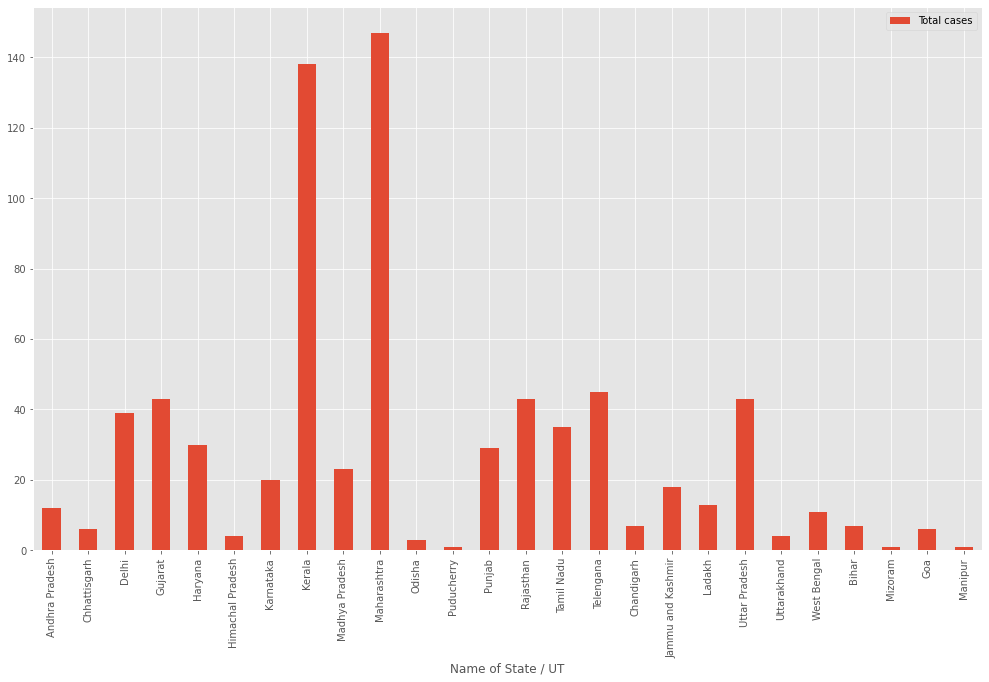

In [10]:
#pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total cases')
#plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total cases')

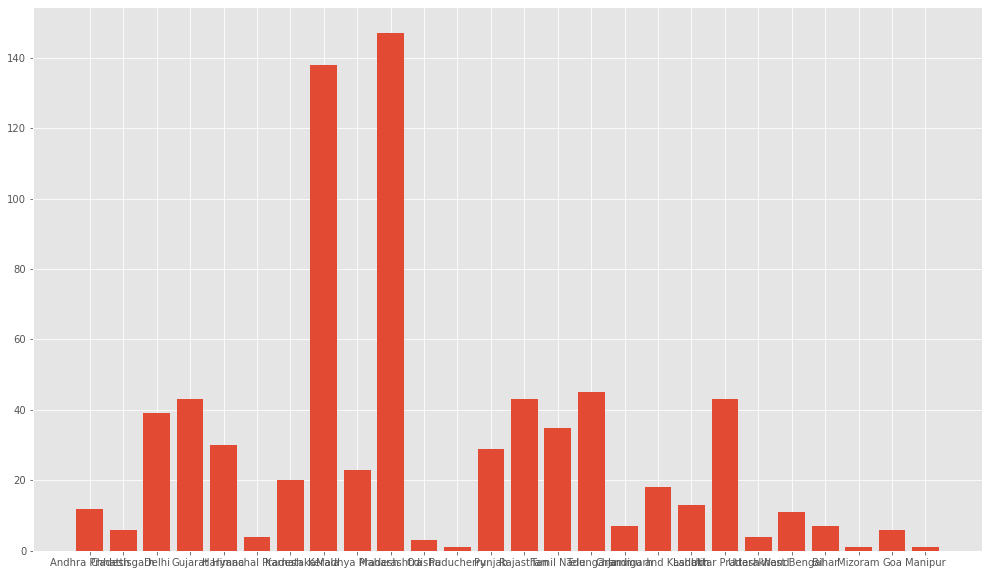

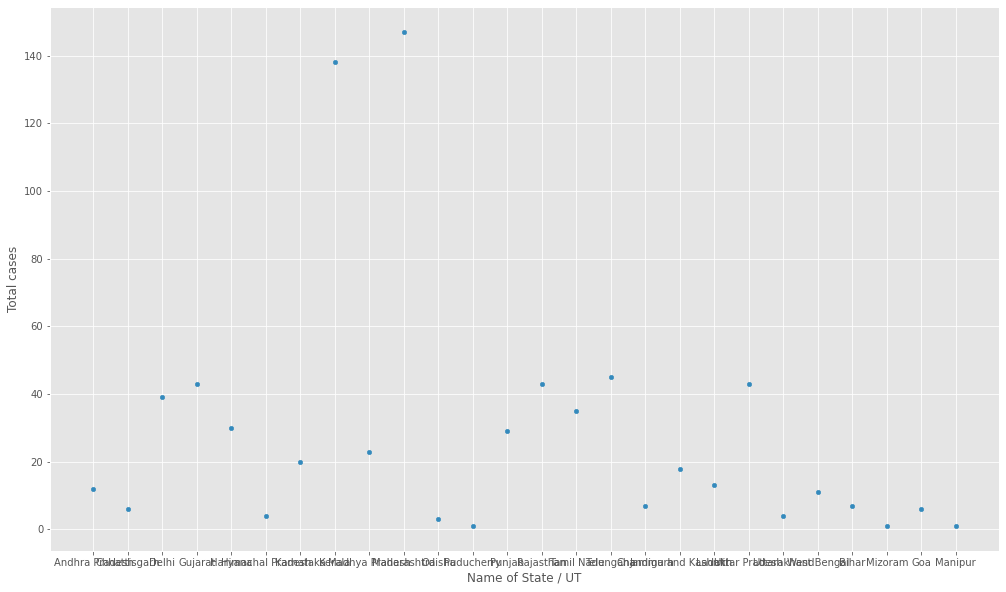

In [11]:
#matplotlib vis
plt.bar(df['Name of State / UT'],df['Total cases'])
plt.show()
df.plot(kind='scatter',x='Name of State / UT',y='Total cases')#pandas implementation
df.iplot(kind='scatter',x='Name of State / UT',y='Total cases',mode='markers+lines',
        title='My Graph',xTitle='Name of State / UT',yTitle='Total cases',color='Red')#plotly implementation

In [12]:
px.bar(df,x='Name of State / UT',y='Total cases')
px.scatter(df,x='Name of State / UT',y='Total cases')

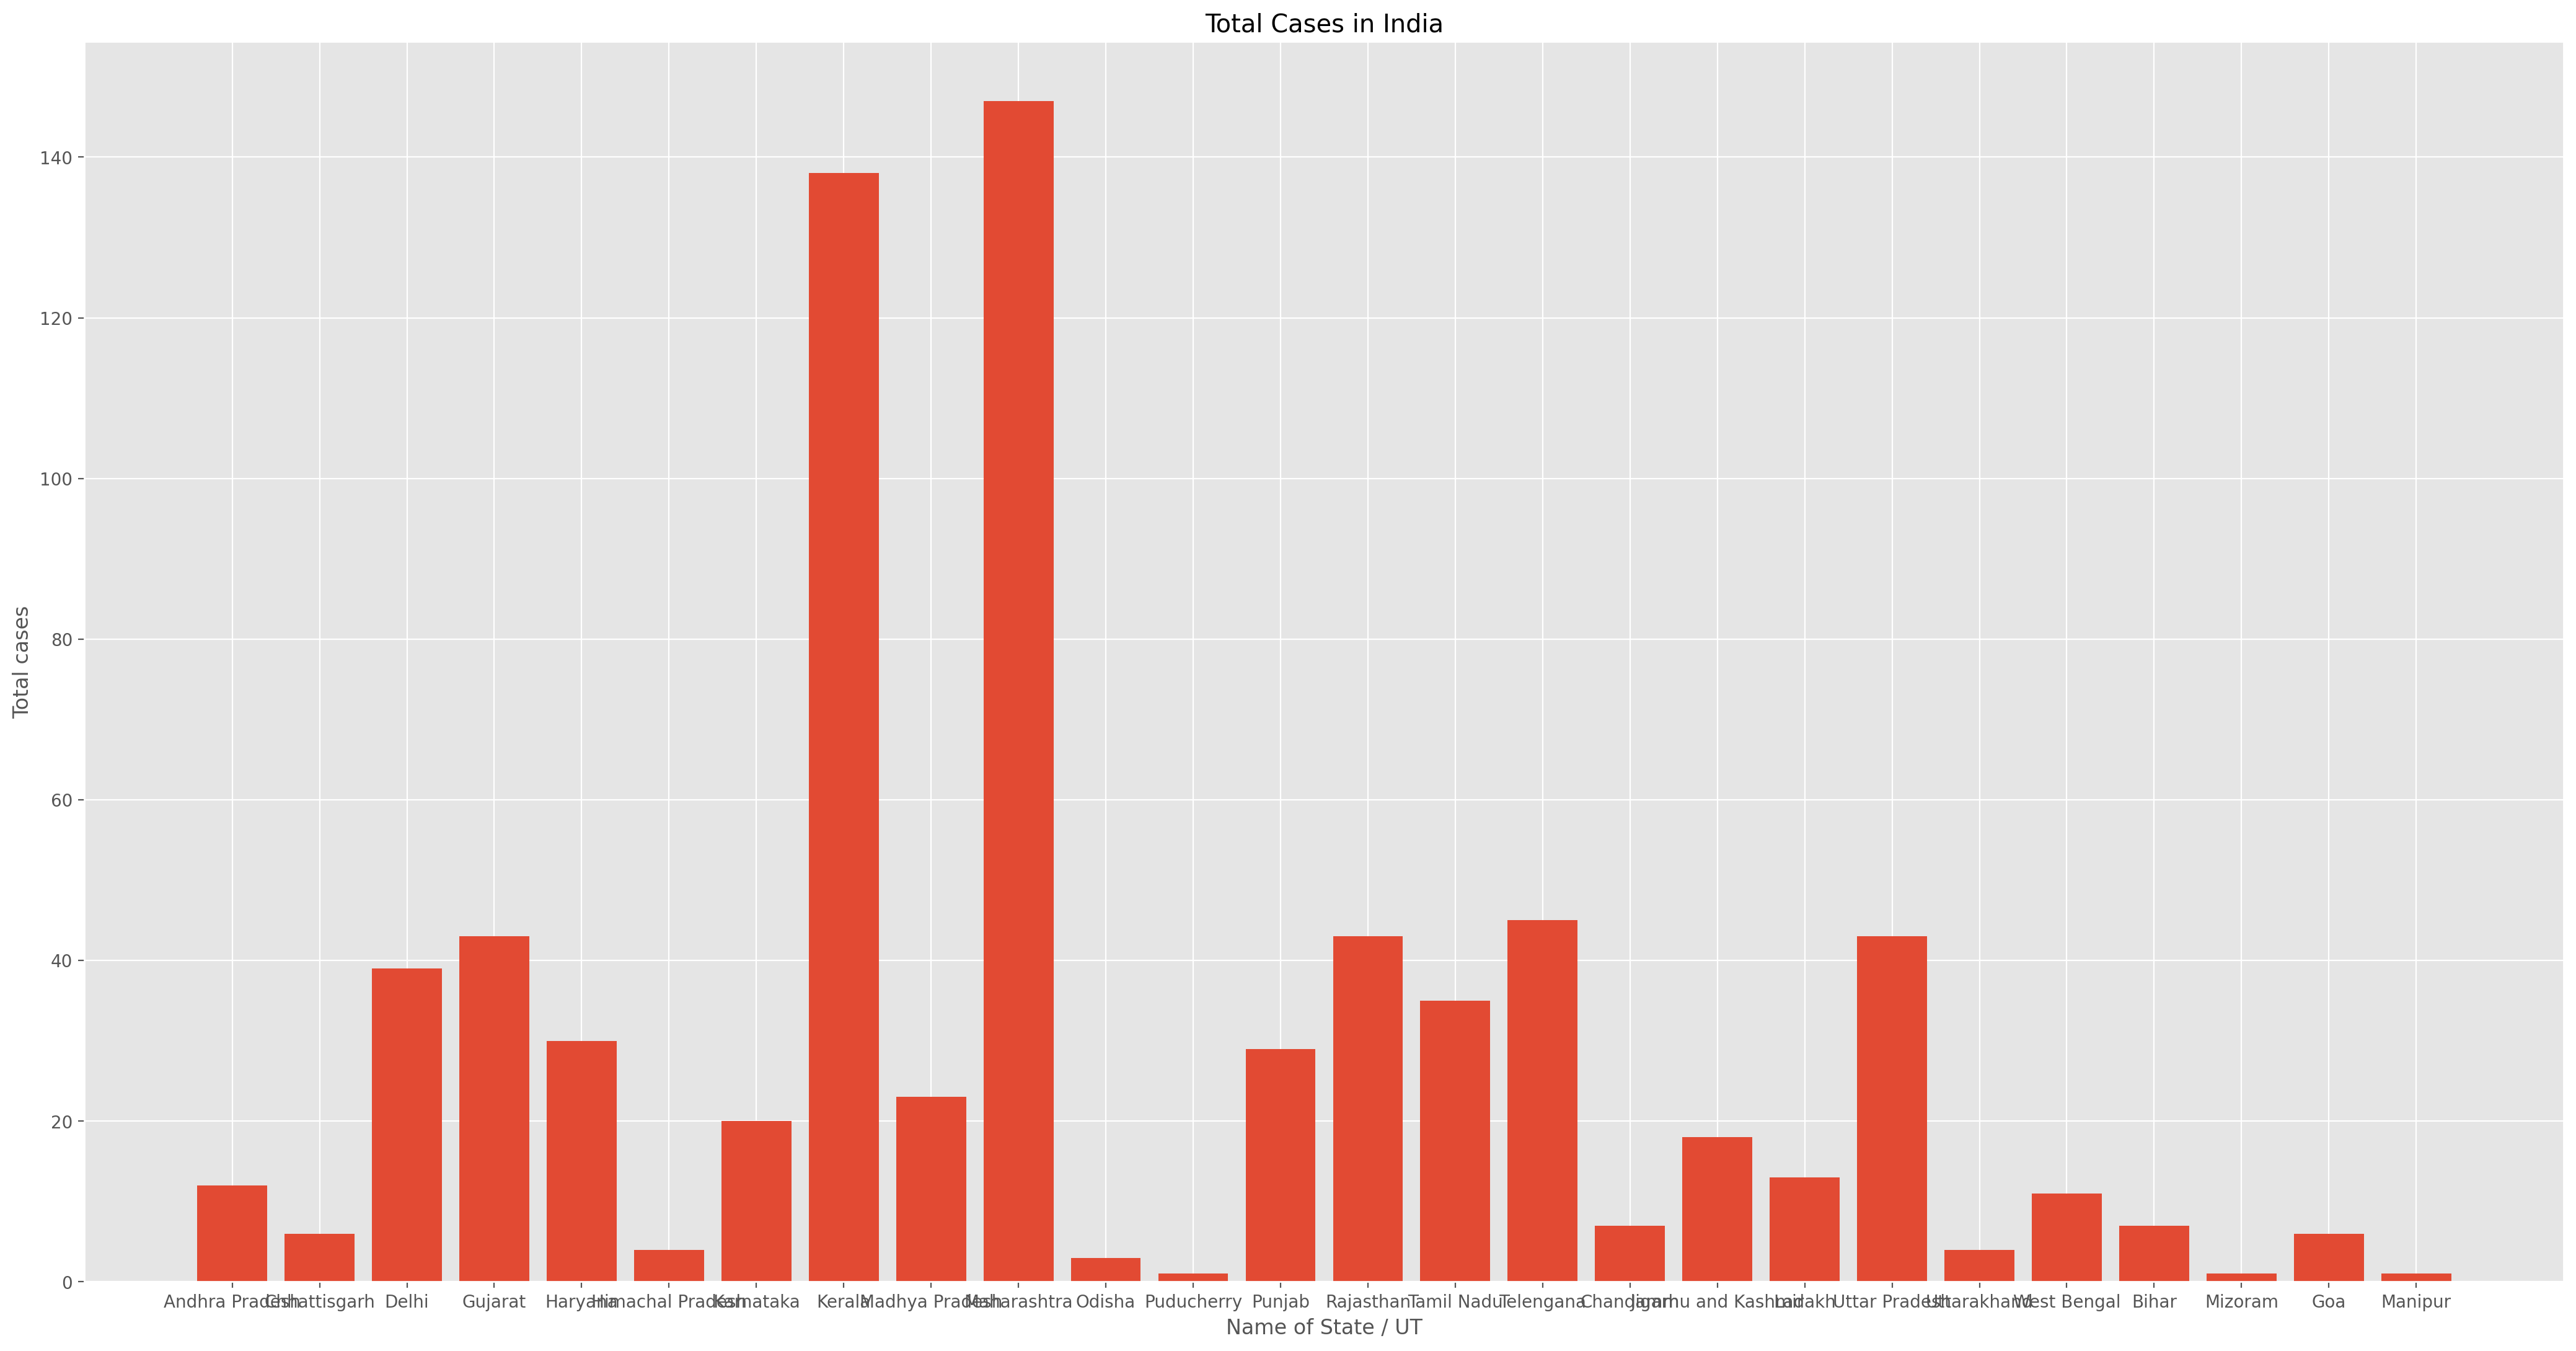

TypeError: 'module' object is not callable

In [13]:
##matplotlib OO
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total cases'])
axes.set_title('Total Cases in India')
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total cases')
plt.show()
#ploty OO
fig=go.Figure()
fig.add_trace(go.bar(x=df['Name of State / UT'],y=df['Total cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total cases'))

In [ ]:
#############################

In [18]:
Indian_cor=pd.read_excel('Indian Coordinates.xlsx')

In [19]:
Indian_cor

Name of State / UT   Latitude  Longitude
0                   Andaman And Nicobar   11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                     Arunachal Pradesh   27.100399  93.616601
3                                 Assam   26.749981  94.216667
4                                 Bihar   25.785414  87.479973
5                            Chandigarh   30.719997  76.780006
6                          Chhattisgarh   22.090420  82.159987
7                Dadra And Nagar Haveli   20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                   Goa   15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                     Himachal Pradesh   31.100025  77.166597
12  Union Territory of Jammu and Kashmir  33.450000  76.240000
13                            Jharkhand   23.800393  86.419986
14                             Karnataka  12.570381  76.919997
15                                Kerala   8.900373  76.569993
16                          Lakshadweep   10.562573  72.636867
17                       Madhya Pradesh   21.300391  76.130019
18                           Maharashtra  19.250232  73.160175
19                              Manipur   24.799971  93.950017
20                            Meghalaya   25.570492  91.880014
21                              Mizoram   23.710399  92.720015
22                             Nagaland   25.666998  94.116570
23                               Orissa   19.820430  85.900017
24                           Puducherry   11.934994  79.830000
25                                Punjab  31.519974  75.980003
26                             Rajasthan  26.449999  74.639981
27                               Sikkim   27.333330  88.616647
28                             Telengana  18.112400  79.019300
29                            Tamil Nadu  12.920386  79.150042
30                              Tripura   23.835404  91.279999
31                         Uttar Pradesh  27.599981  78.050006
32                           Uttarakhand  30.320409  78.050006
33                          West Bengal   22.580390  88.329947
34             Union Territory of Ladakh  34.100000  77.340000

In [20]:
df_full=pd.merge(Indian_cor,df,on='Name of State / UT')
df_full

Name of State / UT   Latitude  Longitude  \
0      Andhra Pradesh  14.750429  78.570026   
1               Delhi  28.669993  77.230004   
2             Haryana  28.450006  77.019991   
3           Karnataka  12.570381  76.919997   
4              Kerala   8.900373  76.569993   
5         Maharashtra  19.250232  73.160175   
6              Punjab  31.519974  75.980003   
7           Rajasthan  26.449999  74.639981   
8           Telengana  18.112400  79.019300   
9          Tamil Nadu  12.920386  79.150042   
10      Uttar Pradesh  27.599981  78.050006   
11        Uttarakhand  30.320409  78.050006   

    Total Confirmed cases (Indian National)  \
0                                        12   
1                                        38   
2                                        16   
3                                        20   
4                                       131   
5                                       144   
6                                        29   
7                                        41   
8                                        34   
9                                        32   
10                                       42   
11                                        4   

    Total Confirmed cases ( Foreign National )  Cured  Death  Total cases  
0                                            0      1      0           12  
1                                            1      6      1           39  
2                                           14     11      0           30  
3                                            0      3      2           20  
4                                            7     11      0          138  
5                                            3     15      4          147  
6                                            0      0      1           29  
7                                            2      3      0           43  
8                                           11      1      0           45  
9                                            3      1      1           35  
10                                           1     11      0           43  
11                                           0      0      0            4

In [21]:
map=folium.Map(location=[20,70],zoom_start=6,tiles='stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>state</strong>: '+str(name).capitalize()+'<br>''<strong)Total cases</strong>: ' +str(value)+'<br>'),color='red',fill_color='red',fill_opacity=0.5).add_to(map)

In [22]:
map

In [23]:
dbd_india=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

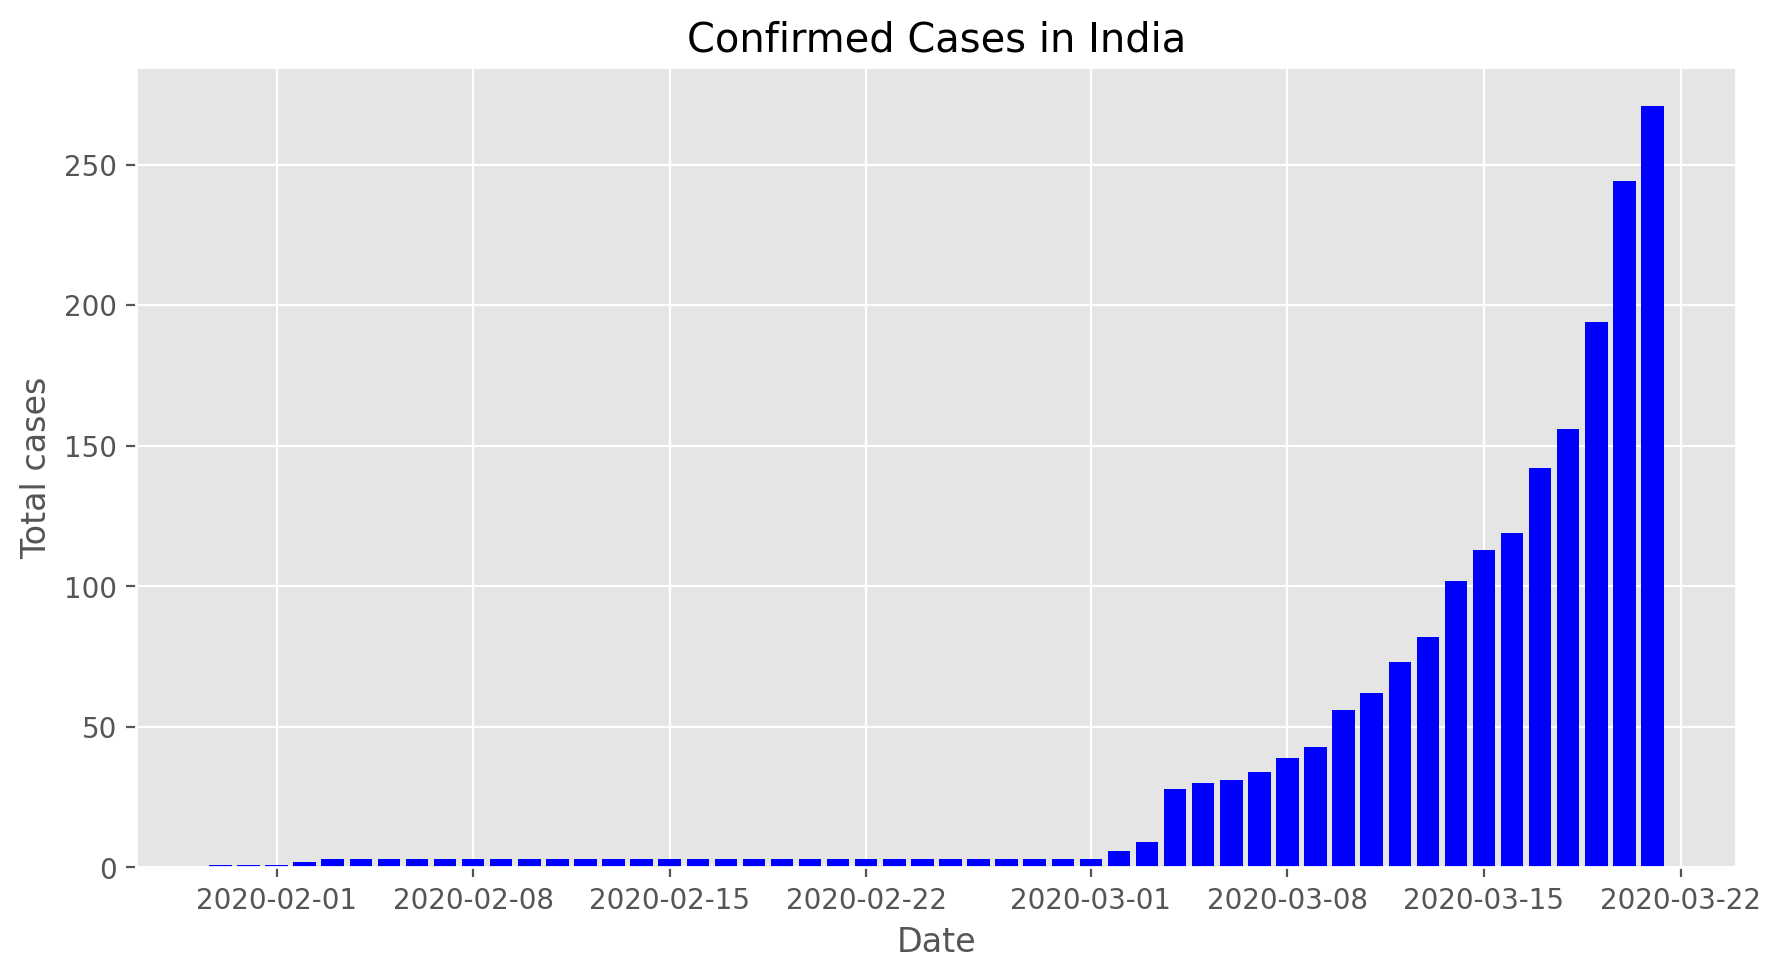

In [24]:
#matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_india['Date'],dbd_india['Total Cases'],color='blue')
axes.set_title('Confirmed Cases in India')
axes.set_xlabel('Date')
axes.set_ylabel('Total cases')
plt.show()
#plotly express
fig=px.bar(dbd_india,x='Date',y='Total Cases',color='Total Cases',title='Confirmed Cases in India')
fig.show()


In [25]:
fig=px.bar(dbd_italy,x='Date',y='Total Cases',color='Total Cases',title='Confirmed Cases in Italy')
fig.show()
fig=px.bar(dbd_korea,x='Date',y='Total Cases',color='Total Cases',title='Confirmed Cases in Korea')
fig.show()
fig=px.bar(dbd_wuhan,x='Date',y='Total Cases',color='Total Cases',title='Confirmed Cases in Wuhan')
fig.show()

In [26]:
fig=px.scatter(dbd_india,x='Date',y='Total Cases',color='Total Cases',title='Confirmed Cases in India')
fig.show()

In [27]:
dbd_india.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [28]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'],y=dbd_india['Total Cases'],mode='lines+markers'))

In [29]:
dbd_italy.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [30]:
#subplots :making plots side by side
from plotly.subplots import make_subplots
fig=make_subplots(rows=2,cols=2,specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
                                      subplot_titles=('S.Korea','India','Italy','Wuhan'))
fig.add_trace(go.bar(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],
                     marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.bar(x=dbd_india['Date'],y=dbd_india['Total Cases'],
                     marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.bar(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],
                     marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),2,1)
fig.add_trace(go.bar(x=dbd_wuhan['Date'],y=dbd_wuhan['Total Cases'],
                     marker=dict(color=dbd_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)
                                                                                      

TypeError: 'module' object is not callable

In [32]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_india['Date'],y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_wuhan['Date'],y=dbd_wuhan['Total Cases'],
                    marker=dict(color=dbd_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale='bluered'),showlegend=False,title_text='Total of all countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [33]:
#world coronavirus

In [34]:
df=pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country','Province/State':'State'},inplace='True')

In [35]:
df.query('Country=="India"')
df.query('State=="Uttar Pradesh"')

SNo        Date          State Country         Last Update  \
39301  39302  06/10/2020  Uttar Pradesh   India 2020-06-11 03:33:41   
40029  40030  06/11/2020  Uttar Pradesh   India 2020-06-12 05:09:52   
40758  40759  06/12/2020  Uttar Pradesh   India 2020-06-13 03:33:14   
41487  41488  06/13/2020  Uttar Pradesh   India 2020-06-14 03:33:15   
42216  42217  06/14/2020  Uttar Pradesh   India 2020-06-15 03:33:14   
42945  42946  06/15/2020  Uttar Pradesh   India 2020-06-16 04:33:09   
43674  43675  06/16/2020  Uttar Pradesh   India 2020-06-17 04:33:21   
44403  44404  06/17/2020  Uttar Pradesh   India 2020-06-18 04:33:18   
45132  45133  06/18/2020  Uttar Pradesh   India 2020-06-19 04:33:17   
45861  45862  06/19/2020  Uttar Pradesh   India 2020-06-20 04:33:19   
46590  46591  06/20/2020  Uttar Pradesh   India 2020-06-21 04:33:19   
47319  47320  06/21/2020  Uttar Pradesh   India 2020-06-22 04:33:20   
48048  48049  06/22/2020  Uttar Pradesh   India 2020-06-23 04:33:22   
48777  48778  06/23/2020  Uttar Pradesh   India 2020-06-24 04:33:28   
49506  49507  06/24/2020  Uttar Pradesh   India 2020-06-25 05:26:54   
50235  50236  06/25/2020  Uttar Pradesh   India 2020-06-26 04:33:43   
50964  50965  06/26/2020  Uttar Pradesh   India 2020-06-27 04:33:35   
51693  51694  06/27/2020  Uttar Pradesh   India 2020-06-28 04:34:04   
52422  52423  06/28/2020  Uttar Pradesh   India 2020-06-29 04:33:44   
53151  53152  06/29/2020  Uttar Pradesh   India 2020-06-30 04:33:48   
53880  53881  06/30/2020  Uttar Pradesh   India 2020-07-01 04:33:52   
54609  54610  07/01/2020  Uttar Pradesh   India 2020-07-02 04:33:46   
55338  55339  07/02/2020  Uttar Pradesh   India 2020-07-03 04:33:54   
56067  56068  07/03/2020  Uttar Pradesh   India 2020-07-04 04:33:51   
56796  56797  07/04/2020  Uttar Pradesh   India 2020-07-05 04:33:46   
57525  57526  07/05/2020  Uttar Pradesh   India 2020-07-06 04:33:57   
58254  58255  07/06/2020  Uttar Pradesh   India 2020-07-07 04:34:00   
58983  58984  07/07/2020  Uttar Pradesh   India 2020-07-08 05:33:48   
59712  59713  07/08/2020  Uttar Pradesh   India 2020-07-09 04:34:23   
60441  60442  07/09/2020  Uttar Pradesh   India 2020-07-10 04:34:24   
61170  61171  07/10/2020  Uttar Pradesh   India 2020-07-11 04:34:26   
61899  61900  07/11/2020  Uttar Pradesh   India 2020-07-12 04:34:30   
62628  62629  07/12/2020  Uttar Pradesh   India 2020-07-13 04:43:04   
63357  63358  07/13/2020  Uttar Pradesh   India 2020-07-14 04:34:46   
64086  64087  07/14/2020  Uttar Pradesh   India 2020-07-15 04:34:39   
64815  64816  07/15/2020  Uttar Pradesh   India 2020-07-16 04:44:59   
65544  65545  07/16/2020  Uttar Pradesh   India 2020-07-17 04:34:50   
66283  66284  07/17/2020  Uttar Pradesh   India 2020-07-18 04:34:45   
67025  67026  07/18/2020  Uttar Pradesh   India 2020-07-19 04:34:58   
67767  67768  07/19/2020  Uttar Pradesh   India 2020-07-20 05:34:40   
68509  68510  07/20/2020  Uttar Pradesh   India 2020-07-21 04:38:46   

       Confirmed  Deaths  Recovered  
39301    11335.0   301.0     6669.0  
40029    12088.0   345.0     7292.0  
40758    12088.0   345.0     7292.0  
41487    12616.0   365.0     7609.0  
42216    13118.0   385.0     7875.0  
42945    13615.0   399.0     8268.0  
43674    14091.0   417.0     8610.0  
44403    14598.0   435.0     8904.0  
45132    15181.0   465.0     9239.0  
45861    15785.0   488.0     9638.0  
46590    16594.0   507.0     9995.0  
47319    17731.0   550.0    10995.0  
48048    18322.0   569.0    11601.0  
48777    18893.0   588.0    12116.0  
49506    19557.0   596.0    12586.0  
50235    20193.0   611.0    13119.0  
50964    20943.0   630.0    13583.0  
51693    21549.0   649.0    14215.0  
52422    22147.0   660.0    14808.0  
53151    22828.0   672.0    15506.0  
53880    23492.0   697.0    16084.0  
54609    24056.0   718.0    16629.0  
55338    24825.0   735.0    17221.0  
56067    25797.0   749.0    17597.0  
56796    26554.0   773.0    18154.0  
57525    27707.0   785.0    18761.0  


In [36]:
x1=df.groupby('Date').sum()['Deaths'].reset_index()
y1=df.groupby('Date').sum()['Recovered'].reset_index()
z1=df.groupby('Date').sum()['Confirmed'].reset_index()


In [37]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=z1['Date'],y=z1['Confirmed'],mode='lines',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=x1['Date'],y=x1['Deaths'],mode='lines',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=y1['Date'],y=y1['Recovered'],mode='lines',name='Recovered',line=dict(color='green',width=2)))

In [38]:
df3=pd.read_csv('time_series_covid_19_confirmed.csv')

In [39]:
df3.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [40]:
df4=pd.merge(df,df3,on=['Country','State'])

In [41]:
df4

SNo        Date State  Country         Last Update  Confirmed  \
0         36  01/22/2020   NaN    Japan 2020-01-22 17:00:00        2.0   
1         74  01/23/2020   NaN    Japan 2020-01-23 17:00:00        1.0   
2        120  01/24/2020   NaN    Japan 2020-01-24 17:00:00        2.0   
3        161  01/25/2020   NaN    Japan 2020-01-25 17:00:00        2.0   
4        207  01/26/2020   NaN    Japan 2020-01-26 16:00:00        4.0   
...      ...         ...   ...      ...                 ...        ...   
28508  64950  07/16/2020   NaN  Lesotho 2020-07-17 04:34:50      256.0   
28509  65679  07/17/2020   NaN  Lesotho 2020-07-18 04:34:45      311.0   
28510  66420  07/18/2020   NaN  Lesotho 2020-07-19 04:34:58      359.0   
28511  67162  07/19/2020   NaN  Lesotho 2020-07-20 05:34:40      359.0   
28512  67904  07/20/2020   NaN  Lesotho 2020-07-21 04:38:46      359.0   

       Deaths  Recovered        Lat        Long  ...  7/11/20  7/12/20  \
0         0.0        0.0  36.204824  138.252924  ...    21430    21841   
1         0.0        0.0  36.204824  138.252924  ...    21430    21841   
2         0.0        0.0  36.204824  138.252924  ...    21430    21841   
3         0.0        0.0  36.204824  138.252924  ...    21430    21841   
4         0.0        1.0  36.204824  138.252924  ...    21430    21841   
...       ...        ...        ...         ...  ...      ...      ...   
28508     3.0       48.0 -29.610000   28.233600  ...      184      233   
28509     6.0       69.0 -29.610000   28.233600  ...      184      233   
28510     6.0       69.0 -29.610000   28.233600  ...      184      233   
28511     6.0       69.0 -29.610000   28.233600  ...      184      233   
28512     6.0       69.0 -29.610000   28.233600  ...      184      233   

       7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  7/20/20  
0        22125    22437    23172    23510    24104    24946    25446    25706  
1        22125    22437    23172    23510    24104    24946    25446    25706  
2        22125    22437    23172    23510    24104    24946    25446    25706  
3        22125    22437    23172    23510    24104    24946    25446    25706  
4        22125    22437    23172    23510    24104    24946    25446    25706  
...        ...      ...      ...      ...      ...      ...      ...      ...  
28508      245      256      256      256      311      359      359      359  
28509      245      256      256      256      311      359      359      359  
28510      245      256      256      256      311      359      359      359  
28511      245      256      256      256      311      359      359      359  
28512      245      256      256      256      311      359      359      359  

[28513 rows x 191 columns]

In [45]:
fig=px.density_mapbox(df4,lat='Lat',lon='Long',hover_name='Confirmed',hover_data=['Confirmed','Deaths','Recovered'],animation_frame='Date',color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide corona virus cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})